# experimental interactive visualisation for MRI plots

## written by B. Soergel for the Autism Gradients project at Brainhack Cambridge 2017

### if you are on a Mac, and the widgets are not working:

"jupyter nbextension enable --py --sys-prefix widgetsnbextension"

*before* starting the notebook server with "jupyter notebook"

https://github.com/ipython/ipywidgets/issues/541

In [3]:
%matplotlib inline
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib import colors
import nilearn
import nilearn.plotting
from __future__ import print_function,division

/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#copied from Richard's notebook
def rebuild_nii(num):

    data = np.load('Mean_Vec.npy')
    a = data[:,num].copy()
    nim = nib.load('cc400_roi_atlas.nii')
    imdat=nim.get_data()
    imdat_new = imdat.copy()

    for n, i in enumerate(np.unique(imdat)):
        if i != 0:
            imdat_new[imdat == i] = a[n-1] * 100000 # scaling factor. Could also try to get float values in nifti...

    nim_out = nib.Nifti1Image(imdat_new, nim.get_affine(), nim.get_header())
    nim_out.set_data_dtype('float32')
    # to save:
    nim_out.to_filename('Gradient_'+ str(num) +'_res.nii')

    nilearn.plotting.plot_epi(nim_out)
    return(nim_out)

/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


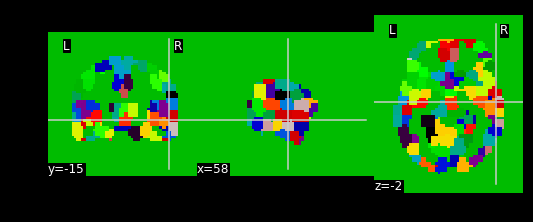

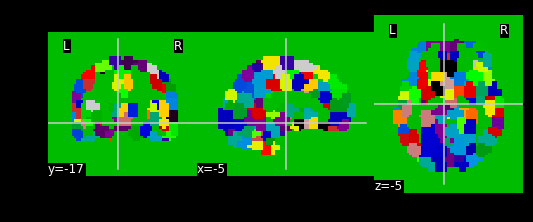

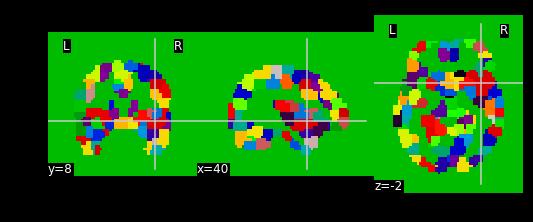

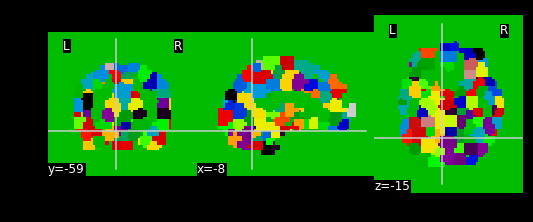

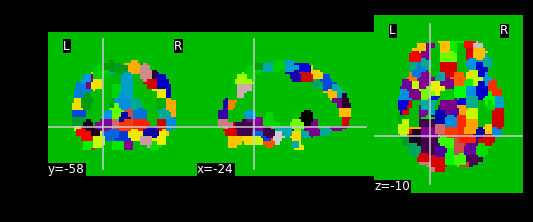

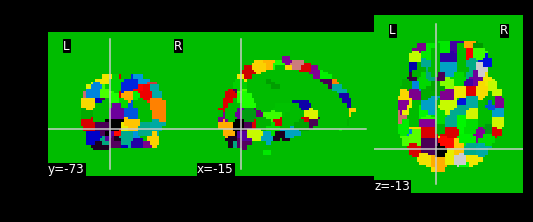

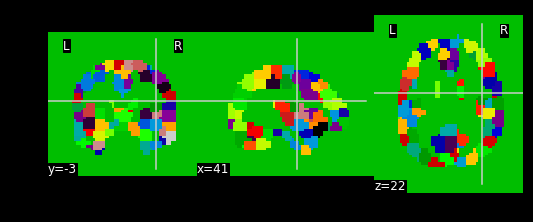

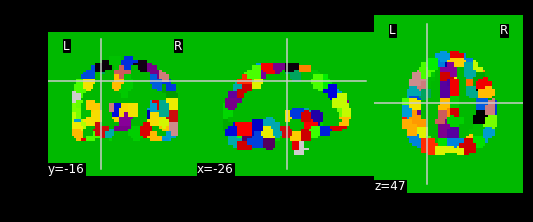

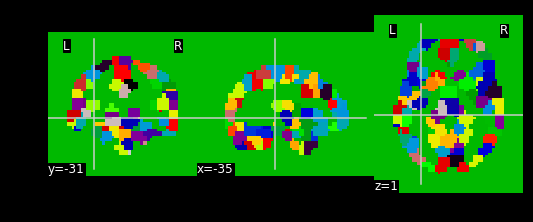

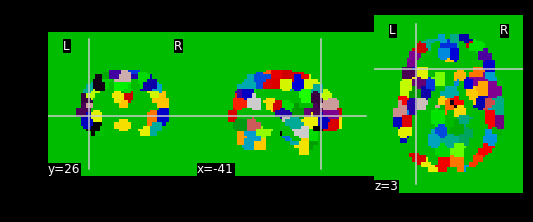

In [5]:
for i in range(10):
    nims = rebuild_nii(i)

actual brain visualisation widget

In [6]:
from ipywidgets import widgets
from ipywidgets import interact,fixed
from IPython.display import display

In [7]:
def rebuild_nii_compute(data,nim,num):
    """
    precompute to make widget faster
    """
    
    #data = np.load('Mean_Vec.npy')
    a = data[:,num].copy()
    #nim = nib.load('cc400_roi_atlas.nii')
    imdat=nim.get_data()
    imdat_new = imdat.copy()

    for n, i in enumerate(np.unique(imdat)):
        if i != 0:
            imdat_new[imdat == i] = a[n-1] * 100000 # scaling factor. Could also try to get float values in nifti...

    nim_out = nib.Nifti1Image(imdat_new, nim.get_affine(), nim.get_header())
    nim_out.set_data_dtype('float32')
    # to save:
    #nim_out.to_filename('Gradient_'+ str(num) +'_res.nii')

    #nilearn.plotting.plot_epi(nim_out)
    return nim_out,imdat_new

def rebuild_nii_plot(num,nims,cutc_x,cutc_y,cutc_z):
    """
    simple plotting function for widget
    """
    cut_coords = (cutc_x,cutc_y,cutc_z)
    fig = nilearn.plotting.plot_epi(nims[num],cut_coords=cut_coords)
    plt.show()
    
def rebuild_nii_plot_new(num,imdats_new,cutc_x,cutc_y,cutc_z,cmap,figsize):
    """
    maybe using matplotlib is faster
    """
    cut_coords = (cutc_x,cutc_y,cutc_z)
    fig,axes=plt.subplots(1,3,figsize=figsize)
    imdat = imdats_new[num]
    axes[0].imshow(imdat[:,cutc_y,:].T,cmap=cmap,origin='lower')
    axes[0].set_title('y')
    axes[1].imshow(imdat[cutc_x,:,:].T,cmap=cmap,origin='lower')
    axes[1].set_title('x')
    axes[2].imshow(imdat[:,:,cutc_z].T,cmap=cmap,origin='lower')
    axes[2].set_title('z')
    plt.show()

In [8]:
#prepare data
data = np.load('Mean_Vec.npy')
nim = nib.load('cc400_roi_atlas.nii')
imdat=nim.get_data()
print(data.shape,imdat.shape)

(392, 10) (63, 75, 61)


In [9]:
#precompute to speed up widget
nims = []
imdats = []
for j in range(data.shape[1]):
    nim_new,imdat_new = rebuild_nii_compute(data,nim,j)
    nims.append(nim_new)
    imdats.append(imdat_new)

/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0


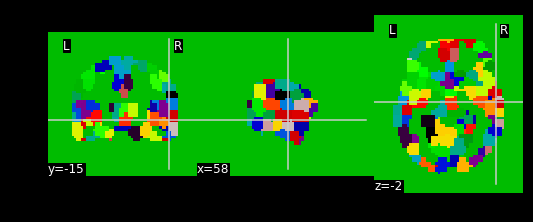

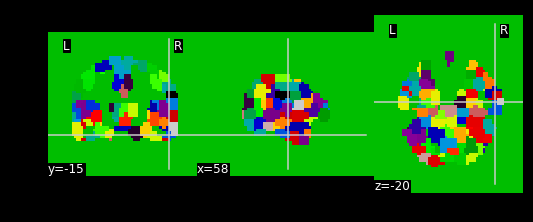

In [10]:
#testing plotting function
nilearn.plotting.plot_epi(nims[0]) #automatic choice of cut_coords
nilearn.plotting.plot_epi(nims[0],cut_coords=(58,-15,-20)) #manual choice

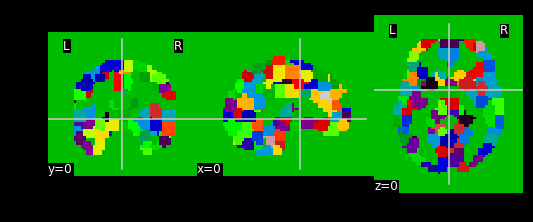

In [11]:
#build widget
coords_max = 60
i = interact(rebuild_nii_plot,
             num=(0,9),
             nims=fixed(nims),
             cutc_x=(-coords_max,coords_max),
             cutc_y=(-coords_max,coords_max),
             cutc_z=(-coords_max,coords_max),
            )

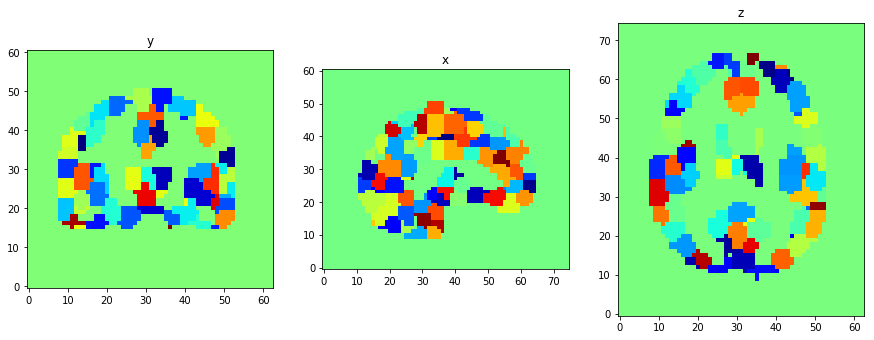

In [12]:
coords_max = imdat.shape
figsize=(15,10)
i = interact(rebuild_nii_plot_new,
             num=(0,9),
             imdats_new=fixed(imdats),
             cutc_x=(0,coords_max[0]-1),
             cutc_y=(0,coords_max[1]-1),
             cutc_z=(0,coords_max[2]-1),
             cmap = ['jet','viridis','gray'],
             figsize=fixed(figsize)
            )

## interactive MRI visualisation with variable projection axes and slices

dataset from https://github.com/datacarpentry/python-neuroimaging-lesson/tree/master/neuroimaging/data

In [17]:
epi_img = nib.load('someones_epi.nii.gz')
epi_data = epi_img.get_data()

In [18]:
def plot_projection(data,axis,pos0,pos1,pos2,cmap,figsize):
    if axis=='x':
        imdat = data[pos0,:,:]
    elif axis=='y':
        imdat = data[:,pos1,:]
    elif axis=='z':
        imdat = data[:,:,pos2]
    
    fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(imdat,cmap=cmap, origin="lower")
    plt.show()

In [19]:
#some settings for widget
data = epi_data
data.shape
figsize=(6,6)

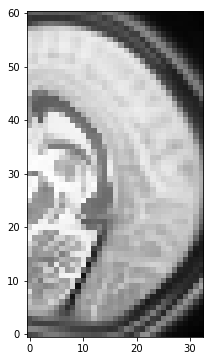

In [20]:
i = interact(plot_projection,
             data=fixed(data),
             axis=['x','y','z'],
             pos0=(0,data.shape[0]-1),
             pos1=(0,data.shape[1]-1),
             pos2=(0,data.shape[2]-1),
             cmap = ['gray','jet','viridis'],
            figsize=fixed(figsize))

# just plotting all slices

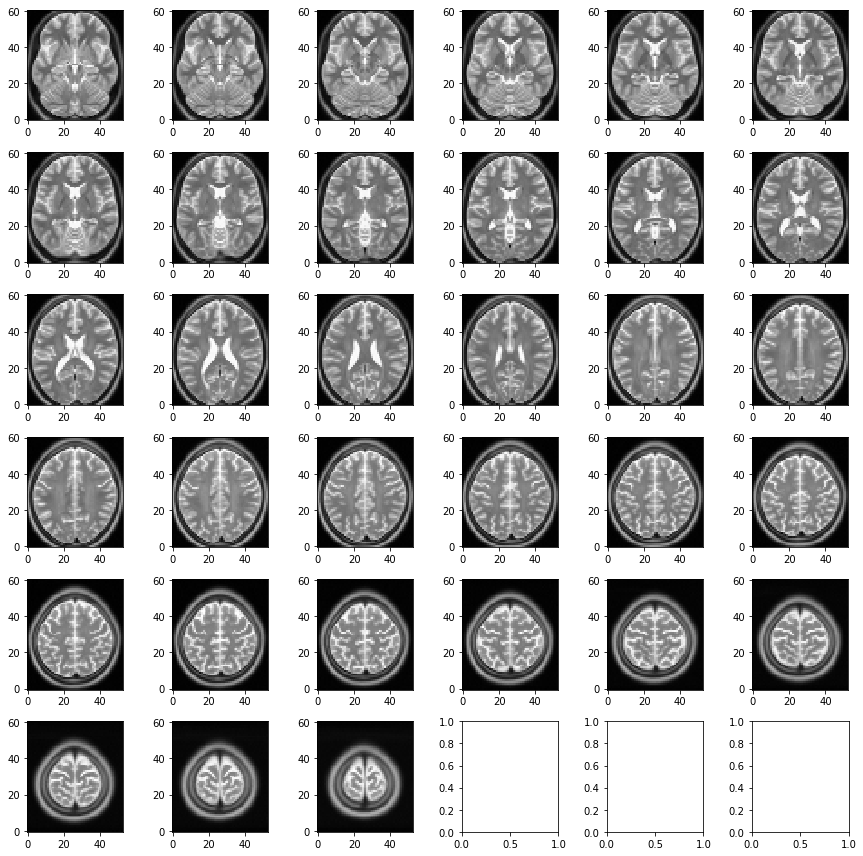

In [21]:
def show_slices_grid(slices,gridsize):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(gridsize, len(slices)//gridsize+1,figsize=(12,12))
    for i, slice in enumerate(slices):
        row = i//gridsize
        column = i%gridsize
        axes[row][column].imshow(slice.T, cmap="gray", origin="lower")
    fig.tight_layout()
    
slices = [epi_data[:,:,i] for i in range(epi_data.shape[2])]        
show_slices_grid(slices,6)

## another widget for a glass brain plot

In [22]:
#from nilearn examples
localizer_dataset = nilearn.datasets.fetch_localizer_button_task()
localizer_tmap_filename = localizer_dataset.tmaps[0]

In [23]:
def plot_glass_threshold(fname,threshold,display_mode):
    nilearn.plotting.plot_glass_brain(fname, threshold=threshold, display_mode=display_mode)
    plt.show()

/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/nilearn/plotting/glass_brain.py:164: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  black_bg = colors.colorConverter.to_rgba(ax.get_axis_bgcolor()) \


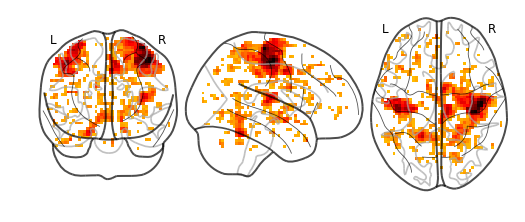

In [24]:
widget_glass = interact(plot_glass_threshold,
                         fname=fixed(localizer_tmap_filename),
                         threshold=(0,5),
                       display_mode=['ortho','xz'])